# Rishita_Chouhan_C6_S3_Hackathon

In [354]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [479]:
df = pd.read_csv("data (1).csv")

In [4]:
sns.set_theme(style="darkgrid")

In [5]:
pd.pandas.set_option("display.max_columns",None)

In [6]:
df.shape

(10692, 13)

In [7]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [12]:
datatype = df.dtypes
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['city', 'animal', 'furniture']
Numerical Columns : ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


In [15]:
from tabulate import tabulate
table = [cat_col, num_col]
print(tabulate({"Categorical":cat_col,
                "continuous": num_col}, 
               headers = ["categorical", "continuous"]))

categorical    continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

# 1.CITY,ANIMAL,FURNISHED

In [9]:
df["city"].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

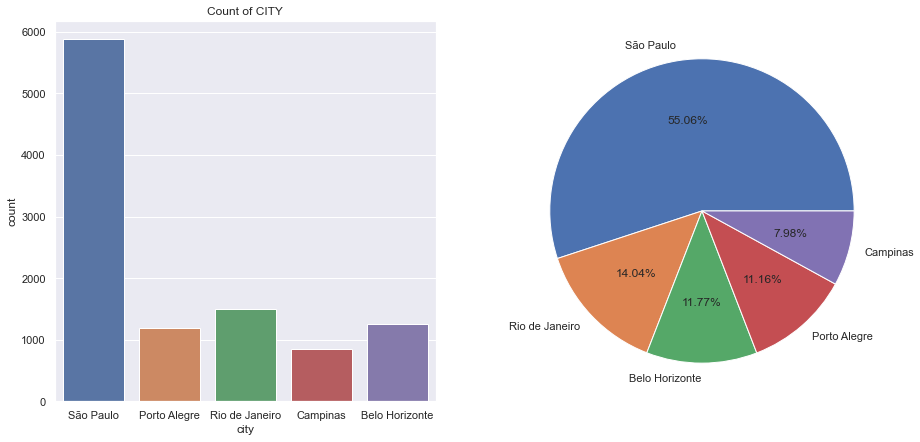

In [494]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of CITY")                  # Set the title of the graph
percentage = df["city"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["city"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

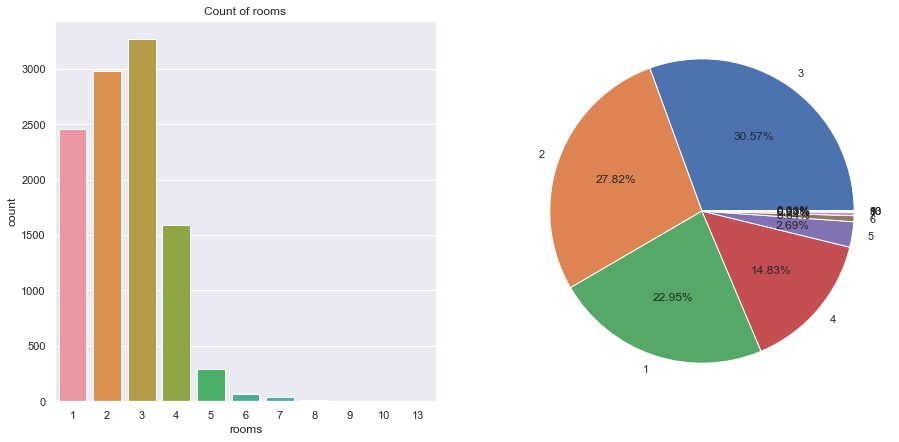

In [495]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of rooms")                  # Set the title of the graph
percentage = df["rooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["rooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["rooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

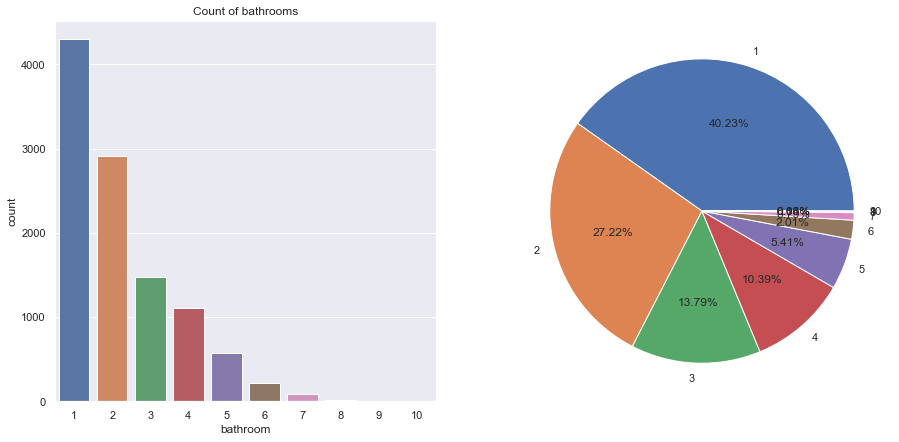

In [496]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of bathrooms")                  # Set the title of the graph
percentage = df["bathroom"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["bathroom"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["bathroom"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

<AxesSubplot:xlabel='bathroom', ylabel='count'>

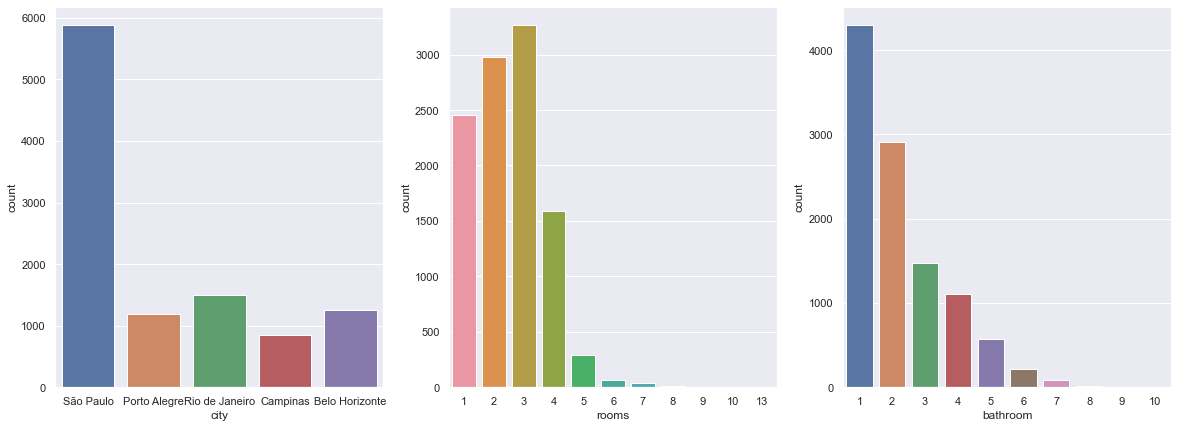

In [478]:
fig,ax = plt.subplots(1,3,figsize = (20,7))
sns.countplot(x = df["city"],ax=ax[0])
sns.countplot(x = df["rooms"],ax=ax[1])
sns.countplot(x = df["bathroom"],ax=ax[2])

##### CONCLUSION FOR CATEGORICAL VAR UNIVARIANTE ANALYSIS

- THERE ARE MAXIMUM NUMBER OF HOUSES AVAILABLE IN OTHER THAN SAO PAULO AND RIO DE JANERIO IS BELO HORIZONTE

- MAX HOUSES HAVE 4 ROOMS AVIALABLE IN THE CITIES

- MAX HOUSES ARE THAT WHICH HAS 1 BATHROOM IN THESE CITIES

# 2. Numerical variable 

<AxesSubplot:xlabel='total (R$)'>

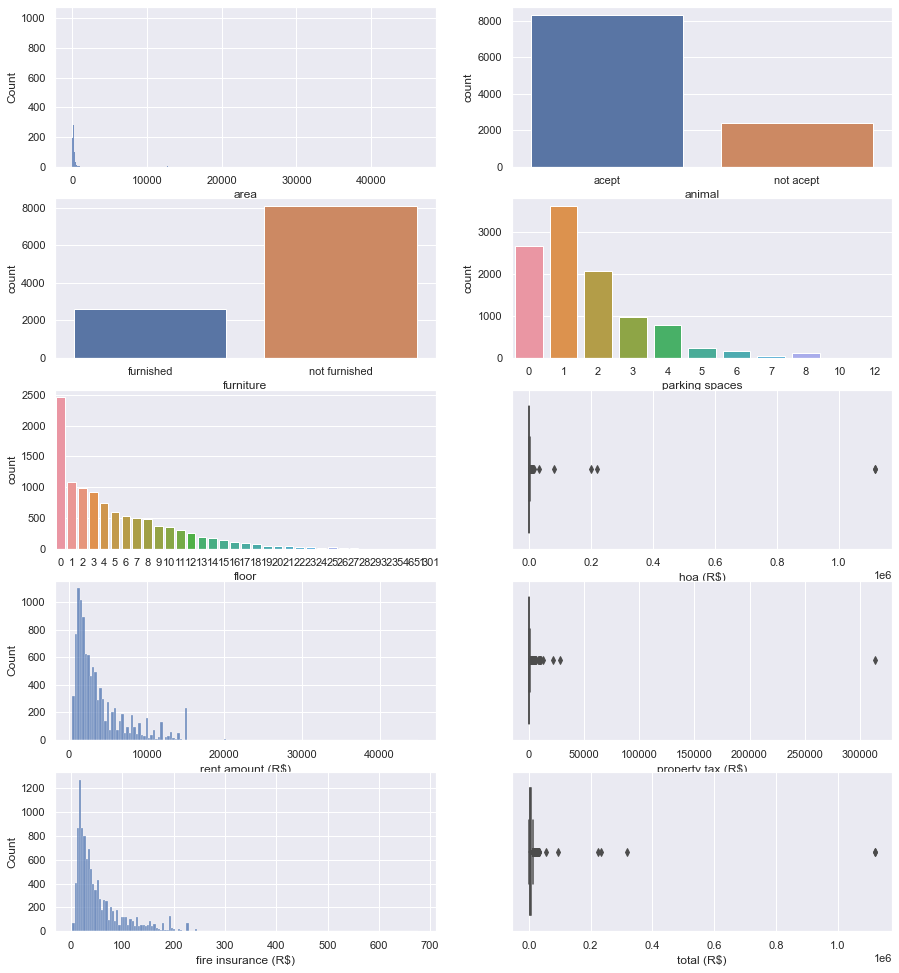

In [480]:
fig,ax = plt.subplots(5,2,figsize = (15,17))
sns.histplot(x = df["area"],ax=ax[0,0])
sns.countplot(x = df["animal"],ax=ax[0,1])
sns.countplot(x = df["furniture"],ax=ax[1,0])
sns.countplot(x = df["parking spaces"],ax=ax[1,1])
sns.countplot(x = df["floor"],ax=ax[2,0])
sns.boxplot(x = df["hoa (R$)"],ax=ax[2,1])
sns.histplot(x = df["rent amount (R$)"],ax=ax[3,0])
sns.boxplot(x = df["property tax (R$)"],ax=ax[3,1])
sns.histplot(x = df["fire insurance (R$)"],ax=ax[4,0])
sns.boxplot(x = df["total (R$)"],ax=ax[4,1])

# Outlier treatment

In [109]:
 # Making changes in data
mean = int(df.area.mean())
# accessing the data higher than 6
x = df[df["area"] > 260].index
for index in x:
    df.loc[index, "area"] = mean

In [118]:
mean = int(df["hoa (R$)"].mean())
# accessing the data higher than 6
x = df[df["hoa (R$)"] > 2010].index
for index in x:
    df.loc[index, "hoa (R$)"] = mean

In [124]:
mean = int(df["rent amount (R$)"].mean())
# accessing the data higher than 6
x = df[df["rent amount (R$)"] > 7400].index
for index in x:
    df.loc[index, "rent amount (R$)"] = mean

In [130]:
mean = int(df["fire insurance (R$)"].mean())
# accessing the data higher than 6
x = df[df["fire insurance (R$)"] > 100].index
for index in x:
    df.loc[index, "fire insurance (R$)"] = mean

In [138]:
mean = int(df["property tax (R$)"].mean())
# accessing the data higher than 6
x = df[df["property tax (R$)"] > 510].index
for index in x:
    df.loc[index, "property tax (R$)"] = mean

In [114]:
mean = int(df["total (R$)"].mean())
# accessing the data higher than 6
x = df[df["total (R$)"] > 10000].index
for index in x:
    df.loc[index, "total (R$)"] = mean

<AxesSubplot:xlabel='total (R$)'>

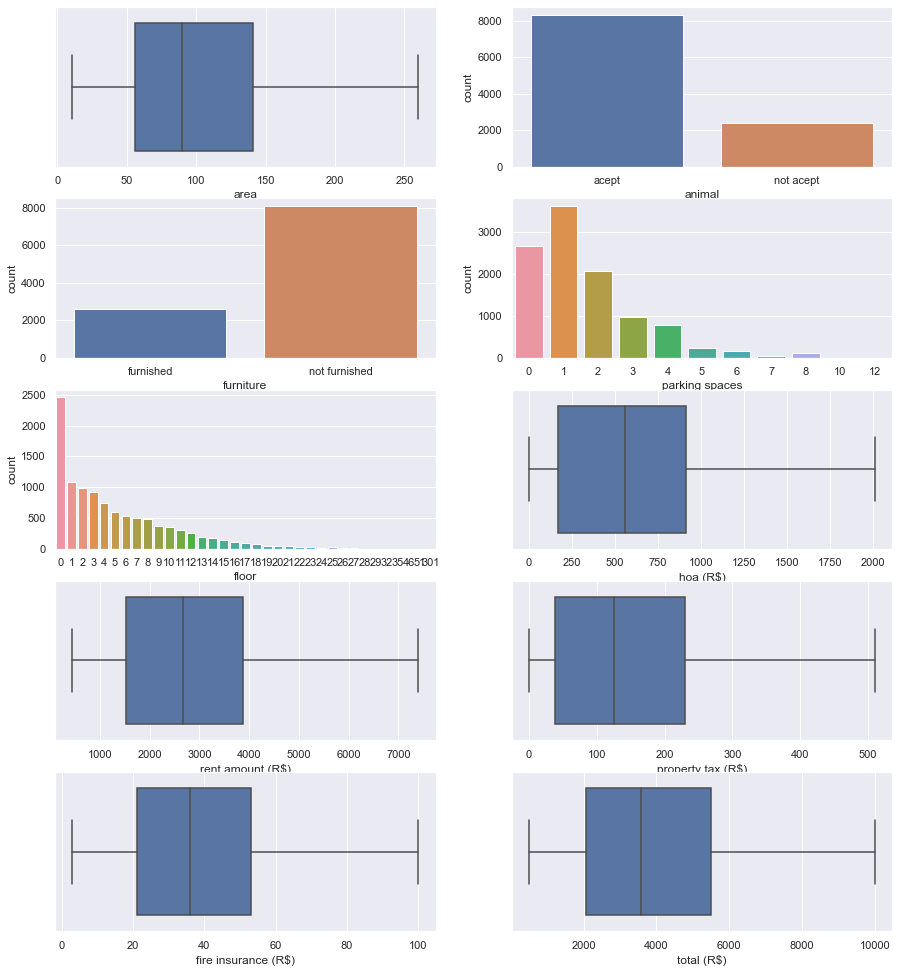

In [139]:
fig,ax = plt.subplots(5,2,figsize = (15,17))
sns.boxplot(x = df["area"],ax=ax[0,0])
sns.countplot(x = df["animal"],ax=ax[0,1])
sns.countplot(x = df["furniture"],ax=ax[1,0])
sns.countplot(x = df["parking spaces"],ax=ax[1,1])
sns.countplot(x = df["floor"],ax=ax[2,0])
sns.boxplot(x = df["hoa (R$)"],ax=ax[2,1])
sns.boxplot(x = df["rent amount (R$)"],ax=ax[3,0])
sns.boxplot(x = df["property tax (R$)"],ax=ax[3,1])
sns.boxplot(x = df["fire insurance (R$)"],ax=ax[4,0])
sns.boxplot(x = df["total (R$)"],ax=ax[4,1])

##### CONCLUSION for continous variable

- Max houses availabe are non furnished
- Max houses accept the animals
- IQR for the area of houses in the cities is 50 to 150
- Max houses have parking spaces for 1 car
- Max houses availabe are ground floored
- HOA lies in IQR of $"200" to $"900" 
- Total expense in the cities lies between 2000 to 5500 dollar

In [ ]:
#SEPARATING THE DATA

In [155]:
df1 = df[(df["city"] == "São Paulo")|(df["city"]=="Rio de Janeiro")]

In [156]:
df2 = df[(df["city"] != "São Paulo")&(df["city"]!="Rio de Janeiro")]

# Bivariante

# cat and cont

In [ ]:
#1.City vs area,hoa,total

# Following questions can be asked about the residents 

       1. What is the avg property availabe in of houses in the cities
       2. What is the avg expense of living in the city including rent and taxes.
       3.  What is the avg home owner association tax  of living in the city which city has the highest and which has the lowest
       4.Compairing the count of furnished and non furnished houses in the cities
       5.Compairing the count of  houses in which the pets are accepted or not in the cities
       6.Compairing the count of no of parking spaces that are availabe in the cities

<AxesSubplot:xlabel='city', ylabel='area'>

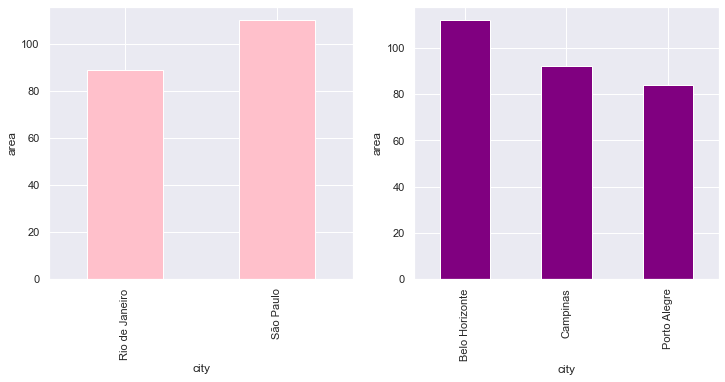

In [482]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
df1.groupby("city")["area"].mean().plot(kind = "bar",color = "pink"
                                        ,ax = ax[0],ylabel = "area")
df2.groupby("city")["area"].mean().plot( kind = "bar",color = "purple",
                                        ax = ax[1] ,ylabel = "area")

CONCLUSION - MAX AREA IN THE CITIES IS BELO HORIZONTE

<AxesSubplot:xlabel='city', ylabel='total (R$)'>

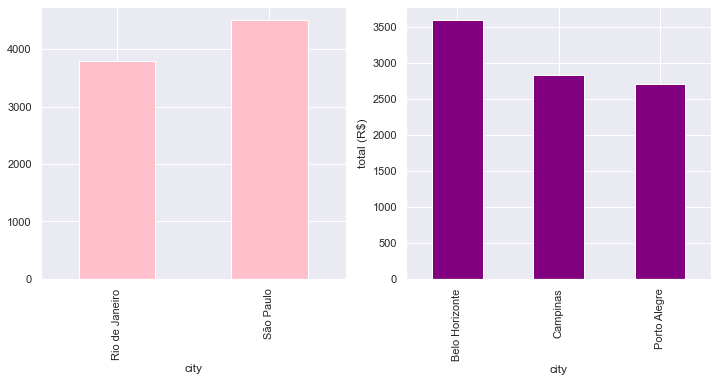

In [316]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
plt.ylabel("total (R$)")
df1.groupby("city")["total (R$)"].mean().plot(kind = "bar",color = "pink"
                                        ,ax = ax[0])
plt.ylabel("total (R$)")
df2.groupby("city")["total (R$)"].mean().plot( kind = "bar",color = "purple",
                                        ax = ax[1] )

CONCLUSION - CITY WITH THE MAX EXPENSE ID BELO HORIZONTE AND MIN EXPENSE IS OF PORTO ALEGRA

<AxesSubplot:xlabel='city', ylabel='hoa'>

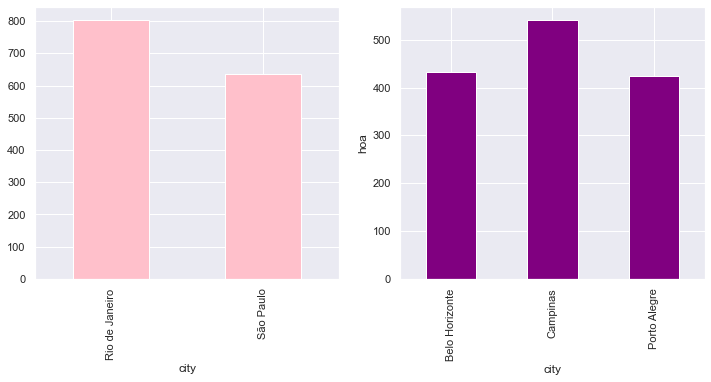

In [324]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
plt.ylabel("hoa")
df1.groupby("city")["hoa (R$)"].mean().plot(kind = "bar",color = "pink"
                                        ,ax = ax[0])

df2.groupby("city")["hoa (R$)"].mean().plot( kind = "bar",color = "purple",
                                        ax = ax[1] )

CONCLUSION - CITY THAT HAS MAX AVG HOA IS CAMPIANA WHEARES RIO DE JANERIO 

<AxesSubplot:xlabel='furniture', ylabel='count'>

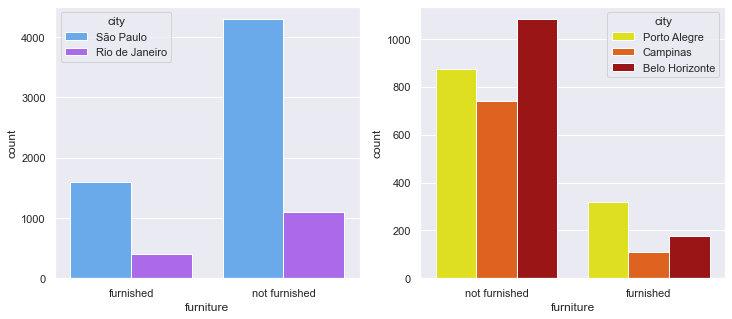

In [318]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x='furniture',hue="city",data=df1,ax=ax[0],palette = "cool")
sns.countplot(x='furniture',hue="city",data=df2,ax=ax[1],palette = "hot_r")

CONCLUSION - IN ALL THE CITIES MAX HOUSES ARE NOT FURMISHED BUT IF THE FAMILY IS LOOKING FOR FURNISHED HOUSES THAT PORTO ALEGRA CAN BE GOOD OPTION

<AxesSubplot:xlabel='animal', ylabel='count'>

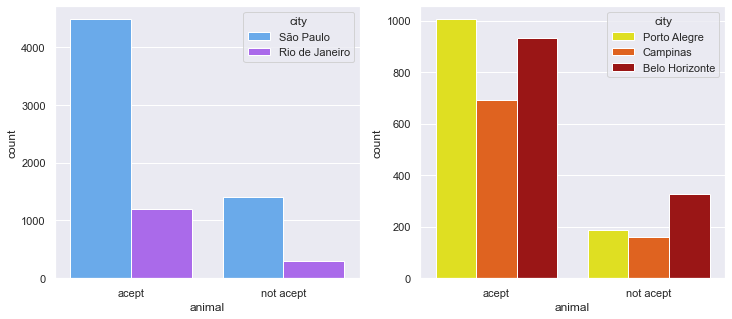

In [319]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x='animal',hue="city",data=df1,ax=ax[0],palette = "cool")
sns.countplot(x='animal',hue="city",data=df2,ax=ax[1],palette = "hot_r")

CONCLUSION - PORTO ALGERA IS THE CITY THAT HAS MAX COUNT OF HOUSES THAT ACCEPT ANIMALS SO THIS CITY CAN BE A GOOD CHOICE FOR FAMILY WITH PETS

<AxesSubplot:xlabel='parking spaces', ylabel='count'>

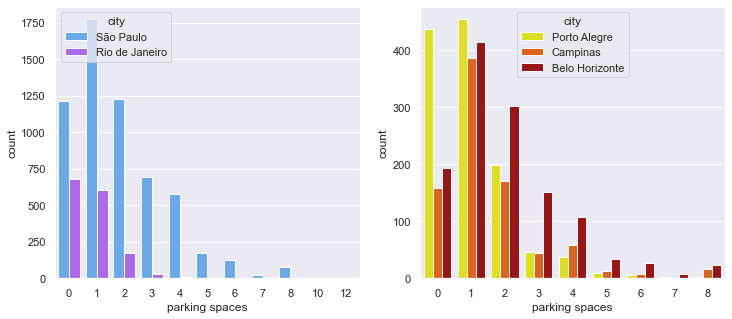

In [321]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x='parking spaces',hue="city",data=df1
             ,ax=ax[0],palette = "cool")
sns.countplot(x='parking spaces',hue="city",data=df2
             ,ax=ax[1],palette = "hot_r")

CONCLUSION - MAX PARKING SPACES AVAILABE ARE FOR ONE CAR HAVING MAX 
COUNT IS PORTO ALGERE

# conclusion bivariante

SO FROM THE BIVARIANTE ANALYSIS WE CAN SEE THAT PORTO ALGRE IS THE 
CITY HAS LESS EXPENSE AND MAX FACILITIES AVAILABE. BUT SINCE THIS IS 
NOT ENOUGH WE NEED TO ANALYSE THE DATA FURTHER

# Following questions can be asked about the residents
- 1. What is the Rent amount variation of the furnished houses in the cities¶
- 2. Rent amount variation of the houses who accept and dont accept pets in the cities¶.
- 3. Area wise rent of the houses in the different cities
- 4. Number of rooms which are furnished in different cities
- 5. Cities which have parking spaces and are funishes or not¶
- 6. What are the num of bathrooms present according to number of room in different citites
- 7. Variation in Parking Spaces with number of rooms in diff cities
- 8. .Prices according to the variation of number of rooms in the cities
- 9. rent variation of the rooms who are furnishes and those who are not
- 10.  Variation of rent amount with parking spaces in the diff cities
- 11. Expense variation with the number of bathrooms in diff cities
- 12. What is the relation with the mean area and mean rent amount per for every city 
- 13. What is the relation between mean area with different rooms and avg expenses according to different rooms

# Multivariante analysis

##### 1.Rent amount variation of the furnished houses in the cities

<AxesSubplot:xlabel='furniture', ylabel='rent amount (R$)'>

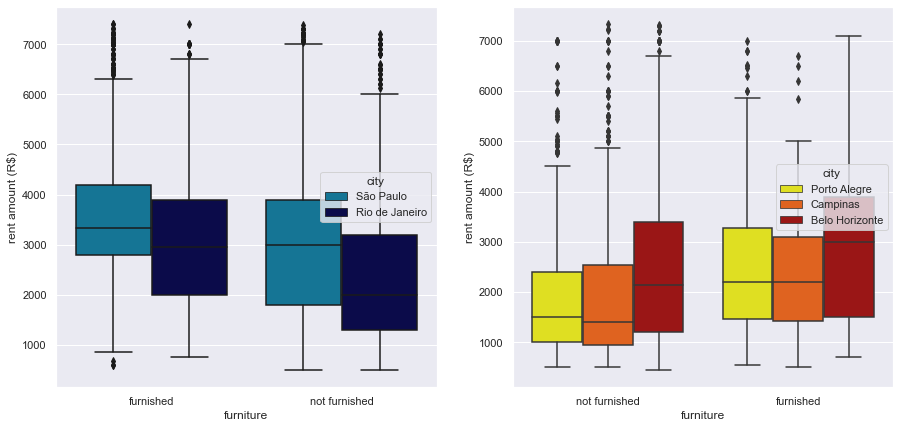

In [486]:
fig,ax = plt.subplots(1,2,figsize = (15,7))
sns.boxplot(data = df1,x = "furniture",y = "rent amount (R$)"
            ,hue = "city",ax=ax[0],palette = "ocean_r")
sns.boxplot(data = df2,x = "furniture",y = "rent amount (R$)"
            ,hue = "city",ax=ax[1],palette = "hot_r")

In [ ]:
CONCLUSION - HERE WE CAN SEE THAT IN SAO PAULO THE PRICES ARE VERY 
HIGH FOR BOTH FURNISHED AND NON FURNISHED BUT IN THE OTHER CITIES THE
PRICES ARE RELATIVELY LOWER AND BELO HORIZONTE HAVE A WIDE RANGE OF 
PRICES FOR FURNISHED HOUSES


#### 2.Rent amount variation of the houses who accept and dont accept pets  in the cities

<AxesSubplot:xlabel='animal', ylabel='rent amount (R$)'>

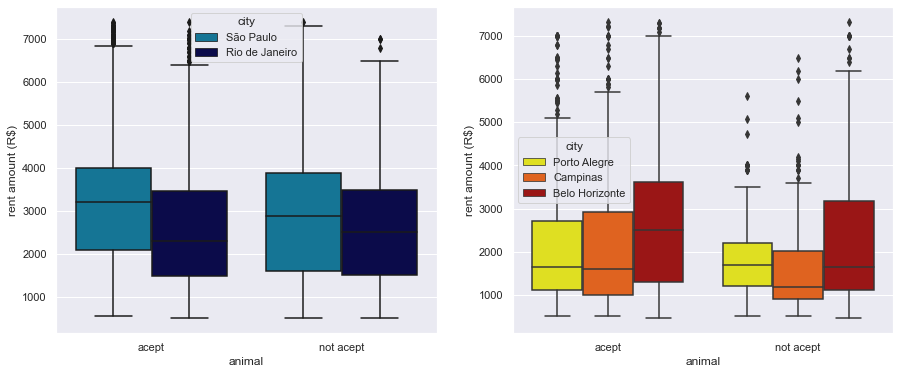

In [363]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.boxplot(data = df1,x = "animal",y = "rent amount (R$)"
            ,hue = "city",ax=ax[0],palette = "ocean_r")
sns.boxplot(data = df2,x = "animal",y = "rent amount (R$)"
            ,hue = "city",ax=ax[1],palette = "hot_r")

BELO HORIZONTE HAVE HIGH RANGE OF PRIZES FOR BOTH THE CONDITIONS THAT 
ALLOW AND DO NOT ALLOW PETS BUT PORTE ALGERA HAVE A VERY LOW RANGE 
OF PRICESA

##### 3. Area wise rent of the houses in the different cities

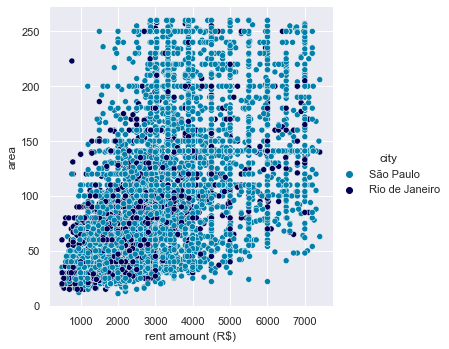

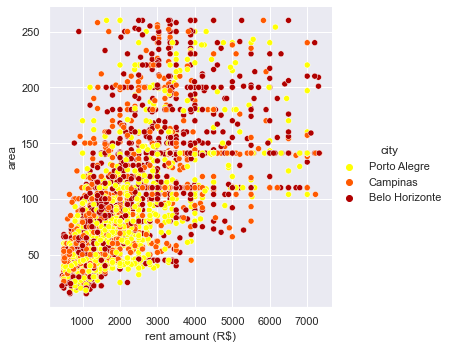

In [355]:
sns.relplot(data = df1,x = "rent amount (R$)"
            ,y = "area"
           ,hue = "city",ax=ax[0],palette = "ocean_r")
sns.relplot(data = df2,x = "rent amount (R$)"
            ,y = "area"
           ,hue = "city",ax=ax[1],palette = "hot_r")

RENT AMOUNT INCREASEDD WITH INCREASING AREAS FOR ALL THE CITIES BUT 
PORTE ALEGRE PRICES HAVE MORE NUMBER OF HOUSES IN LOWER PRICES WHEREAS
BOLO HORIZONTE HAVE ALL THE VARIETY OF THE HOUSES WITH HIGH AREA AND 
LOW PRICES TOO

#### 4 . Number of rooms which are furnished in different cities

<AxesSubplot:xlabel='furniture', ylabel='rooms'>

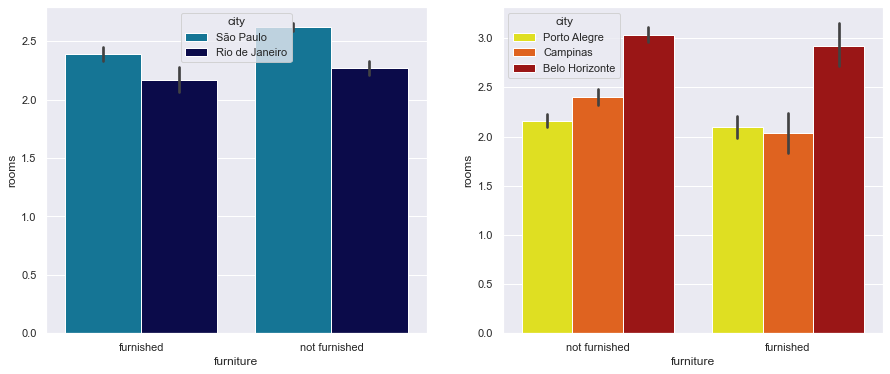

In [362]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.barplot(data = df1,y = "rooms",x = "furniture",hue = "city"
          ,ax=ax[0],palette = "ocean_r" )
sns.barplot(data = df2,y = "rooms",x = "furniture",hue = "city"
          ,ax=ax[1],palette = "hot_r" )

BELO HORIZONTE HAVE MAX NUMBER OF ROOMS THAT ARE FURNITIONES AND 
ARE NOT FUNISHED FOLLOWED BY CAMPINAS AND THEN PORTEALEGRA.

#### 5 . Cities which have parking spaces and are funishes or not

<AxesSubplot:xlabel='furniture', ylabel='parking spaces'>

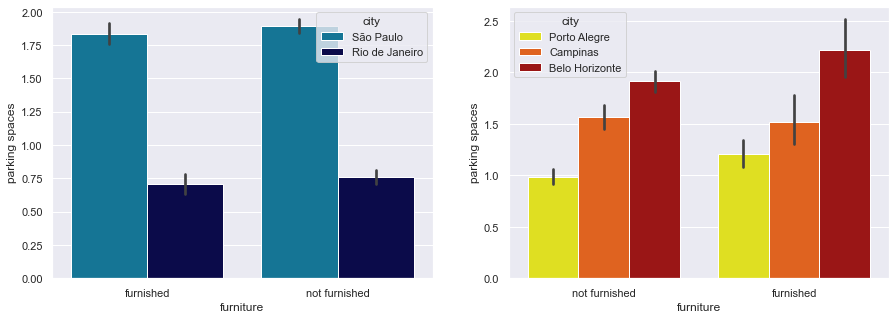

In [361]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
sns.barplot(data = df1,y = "parking spaces",x = "furniture",
            hue = "city",ax=ax[0],palette = "ocean_r")
sns.barplot(data = df2,y = "parking spaces",x = "furniture",
            hue = "city",ax=ax[1],palette = "hot_r")

BELO HORIZONTE PROVIDES MORE NUMBER OF PARKING SPACES WITH BOTH THE 
FURNISHED AND NON FURNISHED HOUSES BUT IF A PERSON HAVE ONLY ONE CAR
PORTE ALEGRA CAN BE A OPTION

#### 6.  What are the num of bathrooms present according to number of room in different citites

<AxesSubplot:xlabel='rooms', ylabel='bathroom'>

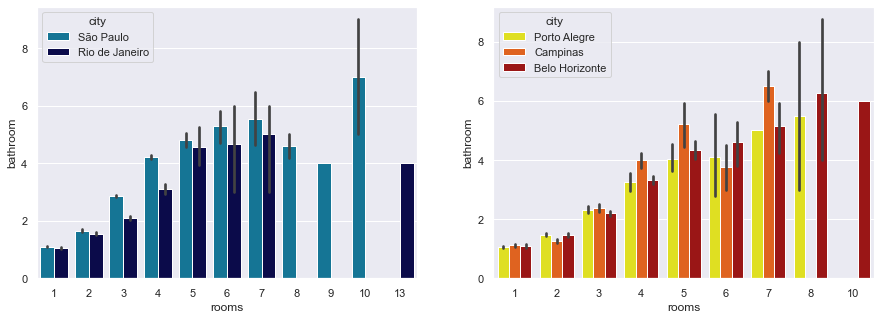

In [364]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
sns.barplot(data = df1,y = "bathroom",x = "rooms",hue = "city",
           ax=ax[0],palette = "ocean_r" )
sns.barplot(data = df2,y = "bathroom",x = "rooms",hue = "city",
           ax=ax[1],palette = "hot_r" )

CONCLUSION
AS THE NUMBER OF ROOMS INCREASES CAMPIANA PROVIDES MORE BATHROOMS WITH
MORE NUMBER OF ROOMS BUT NUMBER OF BATHROOMS PORTE ALEGRE DOESNT HAVE
A WIDE RANGEA

#### 7. Variation in Parking Spaces with number of rooms in diff cities

<AxesSubplot:xlabel='parking spaces', ylabel='rooms'>

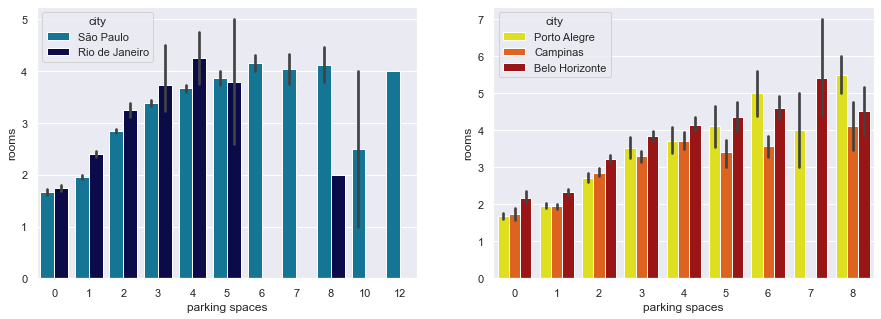

In [365]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
sns.barplot(data = df1,x = "parking spaces",y = "rooms",hue = "city",
           ax=ax[0],palette = "ocean_r")
sns.barplot(data = df2,x = "parking spaces",y = "rooms",hue = "city",
           ax=ax[1],palette = "hot_r")

A PERSON WITH A BIG FAMILY AND NEED MORE NUMBER OF ROOMS BELO HORIZONTE
PROVIDES GOOD FACILITIES AS IT PROVIDES RELATIVELY MORE SPACES
WITH THE SAME ROOM NUMBER THAT ARE PROVIDED BY THE OTHER CITIES

#### 8.Prices according to the variation of number of rooms in the cities

<AxesSubplot:xlabel='rent amount (R$)', ylabel='rooms'>

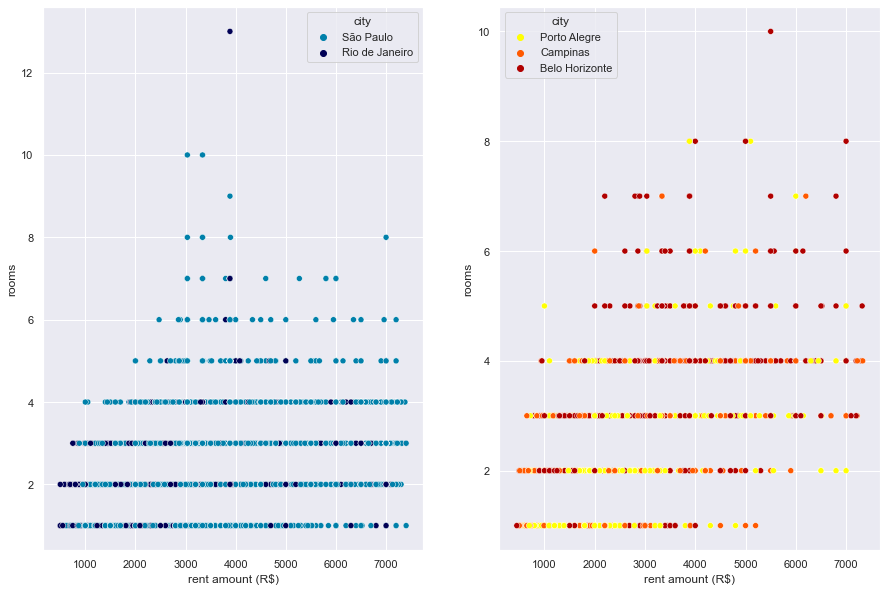

In [368]:
fig,ax = plt.subplots(1,2,figsize = (15,10))
sns.scatterplot(data = df1,x = "rent amount (R$)"
            ,y = "rooms"
           ,hue = "city", ax=ax[0],palette = "ocean_r")
sns.scatterplot(data = df2,x = "rent amount (R$)"
            ,y = "rooms"
           ,hue = "city", ax=ax[1],palette = "hot_r")

HERE IT IS VISIBLE THAT BELO HORIZONTE HAVE LESS RENT AMOUNT EVEN FOR 
LESS NUMBER OF ROOMS WHEREAS PORTE ALEGRA HAVE ALL THE VARIERTY OF 
HOUSE PRICES

#### 9. rent variation of the rooms who are furnishes and those who are not

<AxesSubplot:xlabel='rent amount (R$)', ylabel='rooms'>

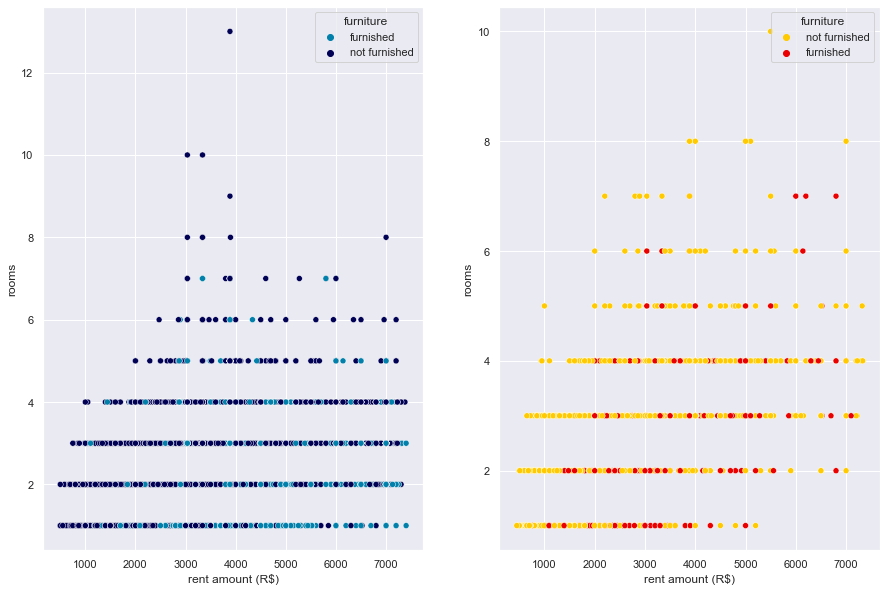

In [371]:
fig,ax = plt.subplots(1,2,figsize = (15,10))
sns.scatterplot(data = df1,x = "rent amount (R$)",y = "rooms",
                hue = "furniture",ax=ax[0],palette = "ocean_r")
sns.scatterplot(data = df2,x = "rent amount (R$)",y = "rooms",
                hue = "furniture",ax=ax[1],palette = "hot_r")

AS THERE ARE MORE NUMBER OF ROOMS WHO ARE NOT FURNISHED AND THERE IS NO SUCH RELATION BETWEEN THESE THREE COLUMNS

#### 10. Variation of rent amount with parking spaces in the diff cities

<AxesSubplot:xlabel='rent amount (R$)', ylabel='parking spaces'>

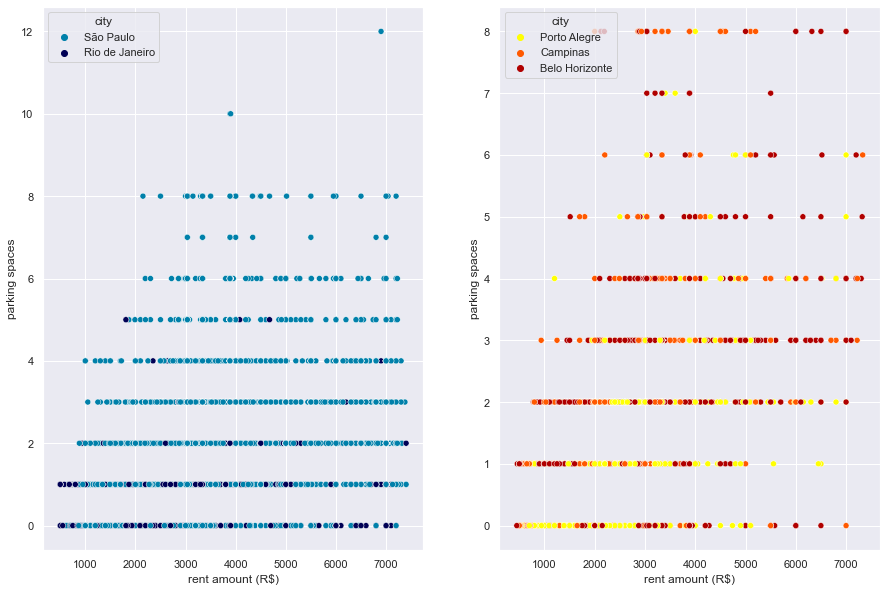

In [372]:
fig,ax = plt.subplots(1,2,figsize = (15,10))
sns.scatterplot(data = df1,x = "rent amount (R$)",y = "parking spaces",
                hue = "city",ax=ax[0],palette = "ocean_r")
sns.scatterplot(data = df2,x = "rent amount (R$)",y = "parking spaces",
                hue = "city",ax=ax[1],palette = "hot_r")

AS THE NUMBER OF PARKING SPACES INCREASES RENT AMOUNT INCREASES 
AND CAMPIANA AND BELO HORIZONTE GIVES MORE NUMBER OF PARKING SPACES 
WITH REASONABLE COST

#### 11. Expense variation with the number of bathrooms in diff cities

<AxesSubplot:xlabel='rent amount (R$)', ylabel='bathroom'>

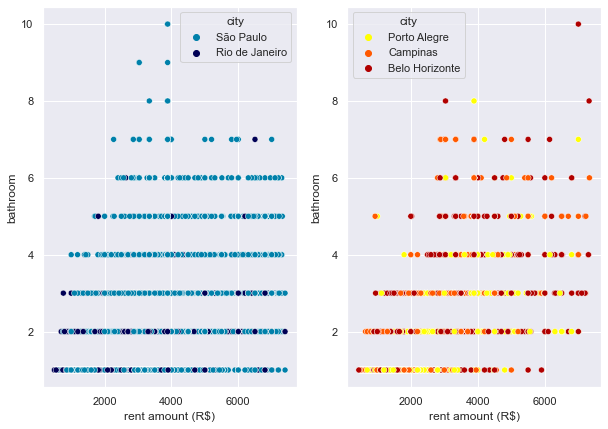

In [376]:
fig,ax = plt.subplots(1,2,figsize = (10,7))
sns.scatterplot(data = df1,x = "rent amount (R$)",y = "bathroom",
                hue = "city",ax=ax[0],palette = "ocean_r")
sns.scatterplot(data = df2,x = "rent amount (R$)",y = "bathroom",
                hue = "city",ax=ax[1],palette = "hot_r")

# 12. What is the relation with the mean area and mean rent amount per for every city 

In [419]:
table = pd.pivot_table(data = df,
                     index = "city",
                     values= 
                       ["area",
                        "rent amount (R$)"
                        ],
                     aggfunc = ["mean"])
table["mean","ratio(rent/area)"] = table[('mean', 'rent amount (R$)')]/table[('mean','area')]

In [420]:
table

mean                                  
                      area rent amount (R$) ratio(rent/area)
city                                                        
Belo Horizonte  112.177266      2579.344197        22.993467
Campinas         92.377491      2000.249707        21.652999
Porto Alegre     83.827326      2040.422464        24.340780
Rio de Janeiro   89.085276      2616.130580        29.366588
São Paulo       110.233226      3216.948701        29.183113

<AxesSubplot:xlabel='None-None', ylabel='city'>

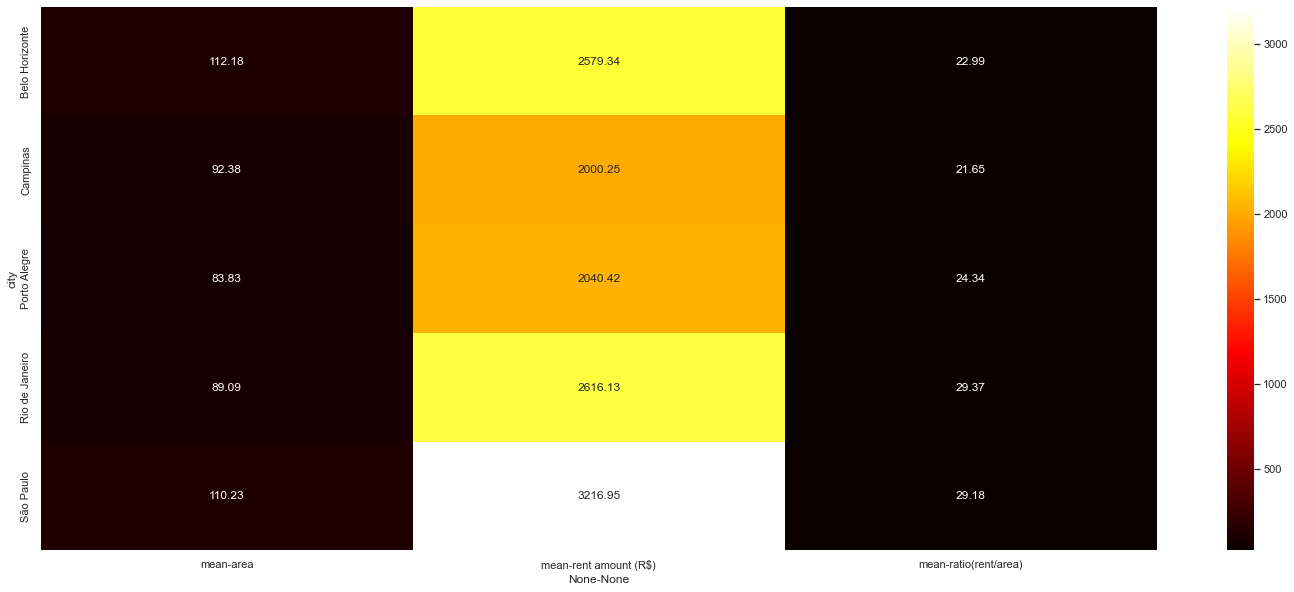

In [431]:
plt.figure(figsize = (25,10))
plt.xlabel("mean")
sns.heatmap(table,annot = True,fmt = ".2f",cmap = 'hot',cbar = True)

SO THE LOWEST RATIO OF MEAN(AREA) WITH THE AVG RENT IS OF CAMPIANA
FOLLOWED BY BELO HORIZONTE

# 13. What is the relation between mean area with different rooms and avg expenses according to different rooms

In [487]:
table = pd.pivot_table(data = df,
                     index = ["city","furniture"],
                     values= 
                       ["area",
                        "rent amount (R$)"
                        ],
                     aggfunc = ["mean"])
table["mean","ratio(rent/area)"] = table[('mean', 'rent amount (R$)')]/table[('mean','area')]

In [488]:
table

mean                                  
                                    area rent amount (R$) ratio(rent/area)
city           furniture                                                  
Belo Horizonte furnished      453.824859      4756.994350        10.482005
               not furnished  167.064755      3485.185014        20.861282
Campinas       furnished      104.297297      2889.648649        27.705882
               not furnished  142.537736      2285.699461        16.035750
Porto Alegre   furnished      116.081505      3026.949843        26.076073
               not furnished   99.057208      2086.131579        21.059866
Rio de Janeiro furnished      107.000000      4227.091133        39.505525
               not furnished  104.735160      2864.283105        27.347866
São Paulo      furnished      148.548650      5573.575016        37.520200
               not furnished  162.739404      4311.199814        26.491432

<AxesSubplot:xlabel='None-None', ylabel='city-furniture'>

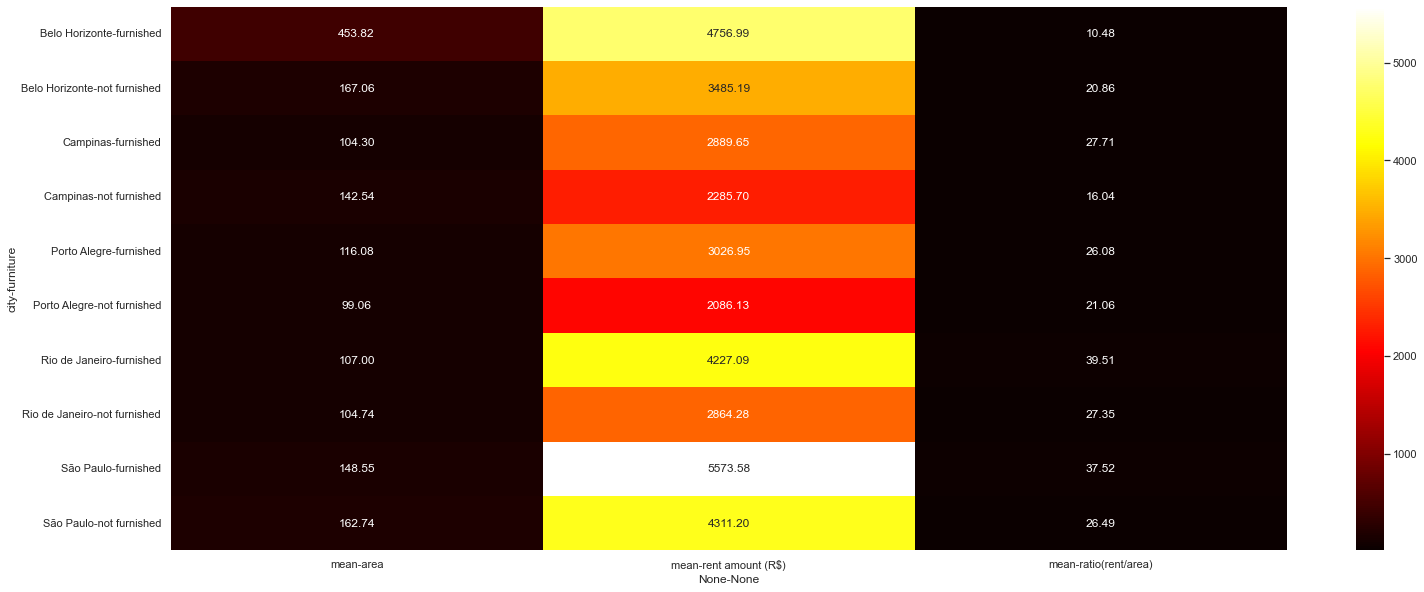

In [489]:
plt.figure(figsize = (25,10))
plt.xlabel("mean")
sns.heatmap(table,annot = True,fmt = ".2f",cmap = 'hot',cbar = True)

In [ ]:
FOR THE FURNISHED HOUSES LEAST RATIO IS FOR BELO HORIZONTE 
AND FOR NON FURNISHED LEAST RATIO IS FOR CAMPIANA

In [499]:
corr=df.corr()
corr

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,-0.012724,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,-0.078687,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.004894,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,-0.020767,0.009321,0.578361,0.098378,0.597348,0.148684
floor,-0.012724,-0.078687,0.004894,-0.020767,1.000000,0.019872,0.073596,0.012626,0.013652,0.036431
hoa (R$),0.006890,0.007139,0.050271,0.009321,0.019872,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.073596,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.012626,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.013652,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.036431,0.955024,0.264490,0.218344,0.254911,1.000000


<AxesSubplot:>

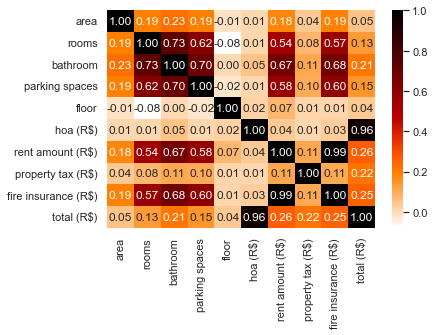

In [502]:
sns.heatmap(corr,annot = True,fmt = ".2f",cmap = 'gist_heat_r',cbar = True)

# conclusion:

1.	IF THE FAMILY IS LOOKING FOR A HOUSE THAT IS FURNISHED AND IS LESS EXPENSIVE AND ALSO ACCEPTS PETS THAN CAMPIANA WILL BE A SUITABLE OPTION.
2.	IF THE FAMILY WANTS A LARGE AREA WITH SUITABLE PRIZING THAN PORTE ALGREA IS A OPTION
3.	IF THE FAMILY WANTS FURNISHED HOUSE WITH ONLY ONE CAR THEY SHOULD GO WITH PORTE ALGERA
4.	SUGGESTION FOR THE FAMILY IF THEY ARE LOOKING FOR FURNISHED HOUSE WITH A LARGE NUMBER OF ROOMS THAN THE CITY OF BELO HORIZONTE
5.	IF THE FAMILY WANTS MORE NUMBER OF PARKING SPACES WITH THE HOUSE BEING FURNISHED THAN BELO HORIZONTE PROVIDES FOR THIS OPTION
6.	BELO HORIZONTE GIVES MORE NUMBER OF PARKING SPACES  EVEN FOR 
LESS NUMBER OF ROOMS WITH REASONABLE COST.
7.	BELO HORIZONTE PROVIDES MORE NUMBER OF PARKING SPACES WITH BOTH THE 
FURNISHED AND NON FURNISHED 

